In [1]:
import pandas as pd
import numpy as np

In [2]:
df_property = pd.read_csv('../data/processed/NeighborhoodValue2.csv')
df_cases = pd.read_csv('../data/processed/cases.csv')

df_dp = pd.read_csv('../data/processed/damagedProperty.csv')
df_fire = pd.read_csv('../data/processed/fireIncidents.csv')
df_homeless = pd.read_csv('../data/processed/homelessConcerns.csv')
df_illegal = pd.read_csv('../data/processed/illegalPostings.csv')
df_noise=pd.read_csv('../data/processed/noiseReports.csv')
df_eviction = pd.read_csv('../data/processed/Eviction.csv')
df_incidents = pd.read_csv('../data/processed/incidents.csv')
df_graffiti = pd.read_csv('../data/processed/graffiti.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,18,19,20,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_property.dtypes

RegionName     object
mean          float64
dtype: object

In [4]:
df_property.RegionName.unique()


array(['Outer Sunset', 'Mission', 'Outer Richmond', 'Inner Richmond',
       'Parkside', 'South of Market', 'Excelsior', 'Pacific Heights',
       'Bernal Heights', 'Nob Hill', 'Portola', 'Western Addition',
       'Bayview', 'Potrero Hill', 'Noe Valley', 'Inner Sunset',
       'Visitacion Valley', 'Crocker Amazon', 'Golden Gate Heights',
       'Marina', 'Ingleside', 'Mission Terrace', 'Silver Terrace',
       'Oceanview', 'North Beach', 'Lone Mountain', 'Sunnyside',
       'Outer Mission', 'Panhandle', 'Buena Vista', 'Ingleside Heights',
       'Lower Pacific Heights', 'South Beach', 'Haight',
       'Presidio Heights', 'Laurel Heights', 'Hayes Valley',
       'Upper Market', 'Miraloma Park', 'Lakeshore', 'Cow Hollow',
       'Glen Park', 'Telegraph Hill', 'Lake', 'Downtown',
       'Diamond Heights', 'Stonestown', 'Westwood Park',
       'Ingleside Terrace', 'Forest Hill', 'Corona Heights',
       'Midtown Terrace', 'Little Hollywood', 'North Waterfront',
       'Forest Knolls', 'Se

In [5]:
ngbh_dist = {'Outer Sunset': '4', 'Mission': '9', 'Outer Richmond': '1', 'Inner Richmond': '1',
       'Parkside': '4', 'South of Market': '6', 'Excelsior': '11', 'Pacific Heights': '2',
       'Bernal Heights': '9', 'Nob Hill': '3', 'Portola': '9', 'Western Addition': '5',
       'Bayview': '10', 'Potrero Hill': '10', 'Noe Valley': '8', 'Inner Sunset': '5',
       'Visitacion Valley': '10', 'Crocker Amazon': '11', 'Golden Gate Heights': '7',
       'Marina': '2', 'Ingleside': '11', 'Mission Terrace': '11', 'Silver Terrace': '10',
       'Oceanview': '11', 'North Beach': '3', 'Lone Mountain': '1', 'Sunnyside': '7',
       'Outer Mission': '11', 'Panhandle': '5', 'Buena Vista': '8', 'Ingleside Heights': '11',
       'Lower Pacific Heights': '5', 'South Beach': '6', 'Haight': '5',
       'Presidio Heights': '2', 'Laurel Heights': '2', 'Hayes Valley': '5',
       'Upper Market': '6', 'Miraloma Park': '7', 'Lakeshore': '7', 'Cow Hollow': '2',
       'Glen Park': '8', 'Telegraph Hill': '3', 'Lake': '2', 'Downtown': '3',
       'Diamond Heights': '8', 'Stonestown': '7', 'Westwood Park': '7',
       'Ingleside Terrace': '7', 'Forest Hill': '7', 'Corona Heights': '8',
       'Midtown Terrace':'7', 'Little Hollywood':'10', 'North Waterfront': '3',
       'Forest Knolls': '7', 'Seacliff': '2', 'St. Francis Wood':'7',
       'Mount Davidson Manor': '7', 'Westwood Highlands': '7'}
df_property["SupervisorDistrict"] = df_property["RegionName"].apply(lambda x: ngbh_dist.get(x))
df_property.head(10)

,RegionName,mean,SupervisorDistrict
0,Outer Sunset,8.714352e+05,4
1,Mission,1.032278e+06,9
2,Outer Richmond,9.992535e+05,1
3,Inner Richmond,1.406422e+06,1
4,Parkside,9.581704e+05,4
5,South of Market,7.602437e+05,6
6,Excelsior,7.156366e+05,11
7,Pacific Heights,1.620902e+06,2
8,Bernal Heights,1.045777e+06,9
9,Nob Hill,1.182511e+06,3


In [6]:
df_property=df_property.rename(columns={"mean": "Average"})
df_Avg=df_property.groupby(df_property['SupervisorDistrict'], as_index=False).Average.mean()

In [7]:
df_Avg=df_Avg.sort_values(by='Average',ascending=False)
df_Avg

,SupervisorDistrict,Average
3,2,2.305980e+06
8,7,1.224938e+06
0,1,1.223525e+06
9,8,1.166863e+06
6,5,1.034404e+06
10,9,9.434864e+05
7,6,9.345296e+05
4,3,9.172469e+05
5,4,9.148028e+05
2,11,7.132012e+05


In [8]:
sd=list(df_Avg['SupervisorDistrict'])
avg=list(df_Avg['Average'])

In [9]:
dict = {'SupervisorDistrict': sd, 'AveragePropertyValue': avg}
df = pd.DataFrame((dict),index=sd)
df['SupervisorDistrict']=df['SupervisorDistrict'].astype(int)

In [10]:
df=df.sort_values(by='SupervisorDistrict',ascending=True)

In [11]:
df_graffiti=df_graffiti.rename(columns={"Supervisor District": "SupervisorDistrict"})
graffiti_districts = df_graffiti.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
gd=list(graffiti_districts)

df_dp=df_dp.rename(columns={"Supervisor District": "SupervisorDistrict"})
dp_districts = df_dp.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
dp=list(dp_districts)

df_fire=df_fire.rename(columns={"Supervisor District": "SupervisorDistrict"})
fire_districts = df_fire.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
fire=list(fire_districts)

df_homeless=df_homeless.rename(columns={"Supervisor District": "SupervisorDistrict"})
homeless_districts = df_homeless.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
homeless=list(homeless_districts)

df_noise=df_noise.rename(columns={"Supervisor District": "SupervisorDistrict"})
noise_districts = df_noise.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
noise=list(noise_districts)

df_eviction=df_eviction.rename(columns={"Supervisor District": "SupervisorDistrict"})
eviction_districts = df_eviction.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
ev=list(eviction_districts)

df_illegal=df_illegal.rename(columns={"Supervisor District": "SupervisorDistrict"})
illegal_districts = df_illegal.groupby(['SupervisorDistrict']).SupervisorDistrict.count()
illegal=list(illegal_districts)

In [12]:
df['Grafiti']=gd
df['DamagedProperty']=dp
df['Homeless']=homeless
df['Noise']=noise
df['Eviction']=ev
df['Illegal']=illegal

In [13]:
df

,SupervisorDistrict,AveragePropertyValue,Grafiti,DamagedProperty,Homeless,Noise,Eviction,Illegal
1,1,1.223525e+06,43387,5783,1593,1064,3292,8644
2,2,2.305980e+06,22126,6615,980,1547,3274,6046
3,3,9.172469e+05,56483,25783,3805,3036,3712,2817
4,4,9.148028e+05,20066,3289,175,822,2548,2769
5,5,1.034404e+06,92972,11489,2490,2572,4544,16628
6,6,9.345296e+05,61470,28170,8850,5448,4176,3345
7,7,1.224938e+06,15784,3854,126,527,3346,3215
8,8,1.166863e+06,57158,6002,3562,2379,5151,7960
9,9,9.434864e+05,98330,8609,4208,2762,4522,4815
10,10,7.057373e+05,27282,3909,2986,1743,2363,2330


In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

labels = df['AveragePropertyValue']
features = df[['Grafiti', 'DamagedProperty', 'Homeless','Noise','Eviction','Illegal']]
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size=0.20)
# Model the data
model = LinearRegression()
model.fit(train_features, train_labels)
model.score(test_features, test_labels)

-19.216629437340725

In [15]:
import seaborn as sns
pred_labels = model.predict(test_features) 
# Plot prediction and actual data
sns.regplot(x = test_labels, 
            y = pred_labels, 
            data = model,
            line_kws={"color":"orange","alpha":0.5,"lw":2}
           )

In [16]:
colList=list(df.columns)
list1=[]
for x in range(2, len(colList)):
    list1.append(colList[x])
list1

['Grafiti', 'DamagedProperty', 'Homeless', 'Noise', 'Eviction', 'Illegal']

In [17]:
df2 = df.loc[:, list1]
df['TotalIncidents'] = df2.sum(axis=1)
df

,SupervisorDistrict,AveragePropertyValue,Grafiti,DamagedProperty,Homeless,Noise,Eviction,Illegal,TotalIncidents
1,1,1.223525e+06,43387,5783,1593,1064,3292,8644,63763
2,2,2.305980e+06,22126,6615,980,1547,3274,6046,40588
3,3,9.172469e+05,56483,25783,3805,3036,3712,2817,95636
4,4,9.148028e+05,20066,3289,175,822,2548,2769,29669
5,5,1.034404e+06,92972,11489,2490,2572,4544,16628,130695
6,6,9.345296e+05,61470,28170,8850,5448,4176,3345,111459
7,7,1.224938e+06,15784,3854,126,527,3346,3215,26852
8,8,1.166863e+06,57158,6002,3562,2379,5151,7960,82212
9,9,9.434864e+05,98330,8609,4208,2762,4522,4815,123246
10,10,7.057373e+05,27282,3909,2986,1743,2363,2330,40613


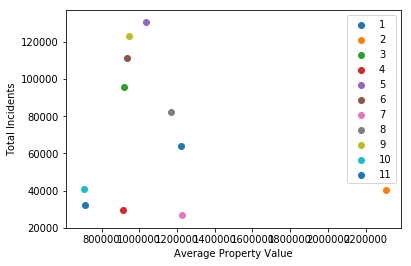

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df.index.name = 'name'

for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'],label=name)

plt.xlabel('Average Property Value')
plt.ylabel('Total Incidents')
plt.legend()
plt.show()

In [19]:
X = df['AveragePropertyValue'].values.reshape(-1,1)
y = df['TotalIncidents'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([[66338.84953649],
       [72227.5089788 ],
       [68437.93398619]])

In [22]:
y_pred = [y for x in y_pred for y in x]
y_test = [y for x in y_test for y in x]
X_test = [y for x in X_test for y in x]
X_train = [y for x in X_train for y in x]
y_train = [y for x in y_train for y in x]

In [23]:
dict = {'Actual': y_test, 'Predicted': y_pred}   
df_pred = pd.DataFrame(dict) 
df_pred

,Actual,Predicted
0,130695,66338.849536
1,40613,72227.508979
2,95636,68437.933986


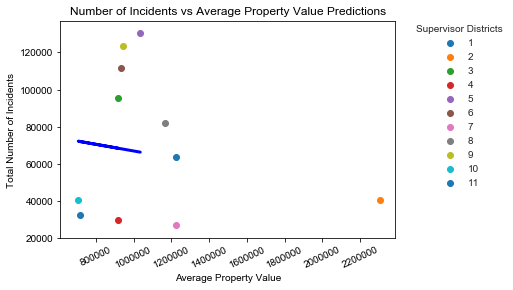

In [24]:
df.index.name = 'name'
for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'], label=name)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title("Number of Incidents vs Average Property Value Predictions")
plt.xlabel('Average Property Value')
plt.ylabel('Total Number of Incidents')
plt.legend(title="Supervisor Districts")
plt.plot(X_test, y_pred, color='blue', linewidth=3)
#plt.xlim([.03, .19])
#plt.ylim([.03, .19])
leg = plt.legend( loc = 'upper right', title="Superviosr Districts")



plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
#bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title="Supervisor Districts")

plt.xticks(rotation=25)
plt.savefig('regressionPred.png', bbox_inches='tight', dpi=300)
#plt.savefig( "../../figures/ValueIncidentReg", dpi=300, format="jpg", bbox_inches='tight')
plt.show()

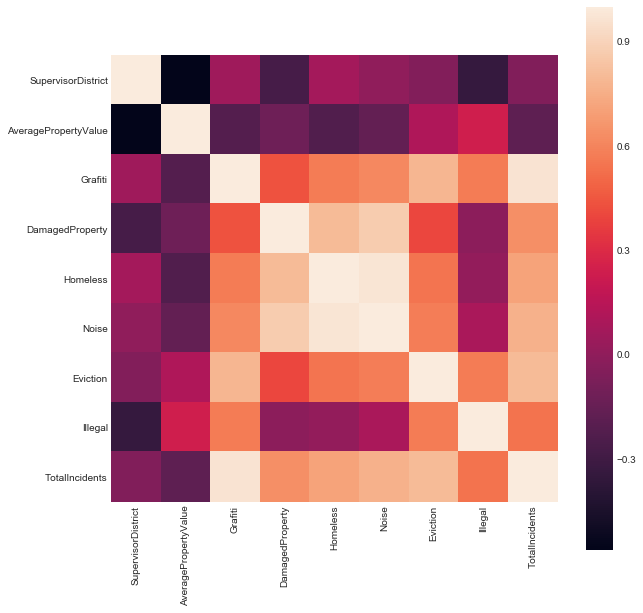

In [25]:
colList=list(df.columns)
fig, ax = plt.subplots(figsize=(10,10))
cl = df[colList].corr()
sns.heatmap(cl, square = True, ax=ax)

In [26]:
from statistics import mean
import numpy as np

xs = np.array(list(df['AveragePropertyValue']))
ys = np.array(list(df['TotalIncidents']))


def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-0.016164368378264543 88395.34244368461


In [27]:

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

-0.016164368378264543 88395.34244368461


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = list(df['AveragePropertyValue'])
y = list(df['TotalIncidents'])
x = np.array(X).reshape((-1, 1))
y = np.array(y)
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.03190700472533381


In [29]:
regression_line = [(m*x)+b for x in xs]

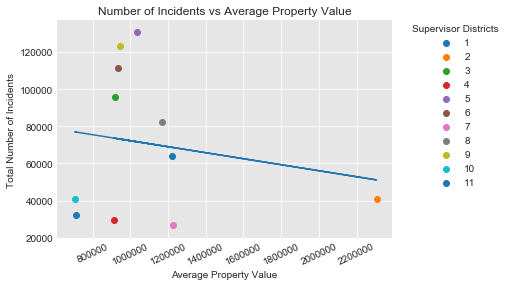

In [30]:
for name,row in df.iterrows():
  plt.scatter(row['AveragePropertyValue'],row['TotalIncidents'], label=name)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.title("Number of Incidents vs Average Property Value")
plt.xlabel('Average Property Value')
plt.ylabel('Total Number of Incidents')
plt.legend(title="Supervisor Districts")
plt.plot(xs, regression_line)
#plt.xlim([.03, .19])
#plt.ylim([.03, .19])
leg = plt.legend( loc = 'upper right', title="Superviosr Districts")



plt.draw() # Draw the figure so you can find the positon of the legend. 

# Get the bounding box of the original legend
#bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title="Supervisor Districts")

plt.xticks(rotation=25)
plt.savefig('ValueIncident.png', bbox_inches='tight', dpi=300)
#plt.savefig( "../../figures/ValueIncidentReg", dpi=300, format="jpg", bbox_inches='tight')
plt.show()

In [31]:
df_all = pd.read_csv('../data/processed/NeighborhoodValue3.csv')

In [42]:
ngbh_dist = {'Outer Sunset': '4', 'Mission': '9', 'Outer Richmond': '1', 'Inner Richmond': '1',
       'Parkside': '4', 'South of Market': '6', 'Excelsior': '11', 'Pacific Heights': '2',
       'Bernal Heights': '9', 'Nob Hill': '3', 'Portola': '9', 'Western Addition': '5',
       'Bayview': '10', 'Potrero Hill': '10', 'Noe Valley': '8', 'Inner Sunset': '5',
       'Visitacion Valley': '10', 'Crocker Amazon': '11', 'Golden Gate Heights': '7',
       'Marina': '2', 'Ingleside': '11', 'Mission Terrace': '11', 'Silver Terrace': '10',
       'Oceanview': '11', 'North Beach': '3', 'Lone Mountain': '1', 'Sunnyside': '7',
       'Outer Mission': '11', 'Panhandle': '5', 'Buena Vista': '8', 'Ingleside Heights': '11',
       'Lower Pacific Heights': '5', 'South Beach': '6', 'Haight': '5',
       'Presidio Heights': '2', 'Laurel Heights': '2', 'Hayes Valley': '5',
       'Upper Market': '6', 'Miraloma Park': '7', 'Lakeshore': '7', 'Cow Hollow': '2',
       'Glen Park': '8', 'Telegraph Hill': '3', 'Lake': '2', 'Downtown': '3',
       'Diamond Heights': '8', 'Stonestown': '7', 'Westwood Park': '7',
       'Ingleside Terrace': '7', 'Forest Hill': '7', 'Corona Heights': '8',
       'Midtown Terrace':'7', 'Little Hollywood':'10', 'North Waterfront': '3',
       'Forest Knolls': '7', 'Seacliff': '2', 'St. Francis Wood':'7',
       'Mount Davidson Manor': '7', 'Westwood Highlands': '7'}
df_all["SupervisorDistrict"] = df_property["RegionName"].apply(lambda x: ngbh_dist.get(x))
df_all.head(10)

,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,mean,SupervisorDistrict
RegionName,,,,,,,,,,,,,,,,,,,,,
Outer Sunset,732900.0,728800.0,725600.0,723100.0,720600.0,717500.0,713400.0,708000.0,702300.0,696800.0,...,1297500,1292100,1283900,1278900,1280000,1281500,1280200,1279000,8.714352e+05,NaN
Mission,785800.0,785400.0,783900.0,781400.0,778900.0,776500.0,772000.0,765400.0,757600.0,749700.0,...,1456900,1457400,1453700,1439900,1428300,1429300,1434600,1435600,1.032278e+06,NaN
Outer Richmond,845200.0,839100.0,831900.0,823500.0,813800.0,803200.0,793900.0,787700.0,783200.0,778500.0,...,1475600,1452700,1434900,1434100,1447000,1454500,1446500,1433700,9.992535e+05,NaN
Inner Richmond,1074700.0,1069600.0,1064300.0,1058500.0,1051500.0,1044300.0,1038600.0,1036000.0,1034000.0,1029800.0,...,2012200,2039400,2035400,2010300,1983900,1977700,1969900,1954500,1.406422e+06,NaN
Parkside,807600.0,804000.0,799800.0,794700.0,788500.0,781800.0,775500.0,769700.0,764400.0,759100.0,...,1370000,1377600,1380100,1381300,1388200,1392300,1392300,1391200,9.581704e+05,NaN
South of Market,672600.0,668300.0,663100.0,657300.0,651700.0,646800.0,641400.0,635200.0,628800.0,622200.0,...,972700,972600,972800,969900,966200,966300,962900,956900,7.602437e+05,NaN
Excelsior,678800.0,669800.0,661100.0,651800.0,641900.0,632400.0,624100.0,616700.0,609700.0,602500.0,...,1085600,1084000,1076400,1069000,1068100,1071100,1070300,1066100,7.156366e+05,NaN
Pacific Heights,1381100.0,1378900.0,1375600.0,1374800.0,1371900.0,1361900.0,1349500.0,1337700.0,1325500.0,1313700.0,...,2116500,2100900,2080200,2072000,2065900,2058700,2043400,2021700,1.620902e+06,NaN
Bernal Heights,806700.0,802700.0,798900.0,795400.0,791600.0,786500.0,779900.0,772600.0,765000.0,757600.0,...,1507400,1500500,1485700,1466800,1453200,1451200,1455200,1455700,1.045777e+06,NaN


df_all=df_all.rename(columns={"mean": "Average"})
df_all=df_all.rename(columns={"2008-01": "idk"})
df_Avg=df_all.groupby(df_all['SupervisorDistrict'], as_index=False)

In [33]:
df_all.set_index('RegionName', inplace=True)

In [34]:
df_toDrop=df_all

In [35]:
colList=list(df_all.columns)
list2008=[]
for x in range(0, 12):
    list2008.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1) 
df2008 = df_all.loc[:, list2008]

In [36]:
mean2008=[]
for i in list2008:
    mean2008.append(df2008[i].mean())
mean2008

[971172.8813559322,
 965613.5593220339,
 960281.3559322034,
 955186.4406779661,
 949371.186440678,
 942788.1355932204,
 936144.0677966102,
 929462.7118644068,
 922855.9322033898,
 916194.9152542372,
 909844.0677966102,
 905054.2372881356]

In [37]:
colList=list(df_toDrop.columns)
list2009=[]
for x in range(0, 12):
    list2009.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1) 
df2009 = df_all.loc[:, list2009]

colList=list(df_toDrop.columns)
list2010=[]
for x in range(0, 12):
    list2010.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2010 = df_all.loc[:, list2010]

colList=list(df_toDrop.columns)
list2011=[]
for x in range(0, 12):
    list2011.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2011 = df_all.loc[:, list2011]
    
colList=list(df_toDrop.columns)
list2012=[]
for x in range(0, 12):
    list2012.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2012 = df_all.loc[:, list2012]
    
colList=list(df_toDrop.columns)
list2013=[]
for x in range(0, 12):
    list2013.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2013 = df_all.loc[:, list2013]
    
colList=list(df_toDrop.columns)
list2014=[]
for x in range(0, 12):
    list2014.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2014 = df_all.loc[:, list2014]

colList=list(df_toDrop.columns)
list2015=[]
for x in range(0, 12):
    list2015.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2015 = df_all.loc[:, list2015]

colList=list(df_toDrop.columns)
list2016=[]
for x in range(0, 12):
    list2016.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2016 = df_all.loc[:, list2016]
    
colList=list(df_toDrop.columns)
list2017=[]
for x in range(0, 12):
    list2017.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2017 = df_all.loc[:, list2017]
    
colList=list(df_toDrop.columns)
list2018=[]
for x in range(0, 12):
    list2018.append(colList[x])
    df_toDrop=df_toDrop.drop([colList[x]], axis = 1)
df2018 = df_all.loc[:, list2018]

In [38]:
mean2009=[]
for i in list2009:
    mean2009.append(df2009[i].mean())
    
mean2010=[]
for i in list2010:
    mean2010.append(df2010[i].mean())

mean2011=[]
for i in list2011:
    mean2011.append(df2011[i].mean())

mean2012=[]
for i in list2012:
    mean2012.append(df2012[i].mean())

mean2013=[]
for i in list2013:
    mean2013.append(df2013[i].mean())

mean2014=[]
for i in list2014:
    mean2014.append(df2014[i].mean())

mean2015=[]
for i in list2015:
    mean2015.append(df2015[i].mean())

mean2016=[]
for i in list2016:
    mean2016.append(df2016[i].mean())

mean2017=[]
for i in list2017:
    mean2017.append(df2017[i].mean())

mean2018=[]
for i in list2018:
    mean2018.append(df2018[i].mean())

In [39]:
df5 = pd.DataFrame(list(zip(mean2008, mean2009,mean2010, mean2011, mean2012, mean2013, mean2014, mean2015, mean2016, mean2017)), 
               columns =['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']) 

In [40]:
df5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,971172.881356,901279.661017,865089.830508,831249.152542,826822.033898,9.528458e+05,1.108103e+06,1.262281e+06,1.409583e+06,1.430937e+06
1,965613.559322,895694.915254,867105.084746,825033.898305,834661.016949,9.604034e+05,1.122027e+06,1.280424e+06,1.416617e+06,1.435747e+06
2,960281.355932,887966.101695,865164.406780,818838.983051,844077.966102,9.752237e+05,1.132420e+06,1.305844e+06,1.420014e+06,1.443931e+06
3,955186.440678,879283.050847,860581.355932,813876.271186,852737.288136,9.949966e+05,1.145868e+06,1.326512e+06,1.417451e+06,1.454876e+06
4,949371.186441,870249.152542,858528.813559,809996.610169,862161.016949,1.011136e+06,1.161905e+06,1.341156e+06,1.413803e+06,1.466673e+06
5,942788.135593,862183.050847,856784.745763,805516.949153,875859.322034,1.024686e+06,1.177142e+06,1.354349e+06,1.408369e+06,1.480107e+06
6,936144.067797,856755.932203,852123.728814,802345.762712,891145.762712,1.040192e+06,1.190203e+06,1.368859e+06,1.401329e+06,1.490890e+06
7,929462.711864,853794.915254,847486.440678,802606.779661,904584.745763,1.056163e+06,1.201268e+06,1.380559e+06,1.397773e+06,1.498876e+06
8,922855.932203,853130.508475,843979.661017,806083.050847,915710.169492,1.067729e+06,1.212166e+06,1.388505e+06,1.402014e+06,1.509320e+06
9,916194.915254,854227.118644,840645.762712,812254.237288,927911.864407,1.073144e+06,1.226349e+06,1.391788e+06,1.409275e+06,1.523686e+06


Text(0.5,1,'Average Property Value Change')

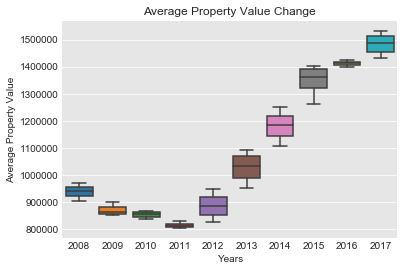

In [41]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
country_firstleague_ranks = sns.boxplot( data=df5).set(
    xlabel='Years', 
    ylabel='Average Property Value'
)
plt.savefig('avgBoxPlot.png', bbox_inches='tight', dpi=300)
plt.title('Average Property Value Change')